Correlation Factor in Panel a: 0.555

All experiments: N = 74
count005: 49
Success rate: 66.22%

Good experiments: N = 25
count005: 23
Success rate: 92.00%

Bad experiments: N = 49
count005: 26
Success rate: 53.06%


N: 74, sigma: 0.061, mean: -0.012, median: -0.004
N: 25, sigma: 0.039, mean: 0.001, median: -0.001
N: 49, sigma: 0.069, mean: -0.018, median: -0.009


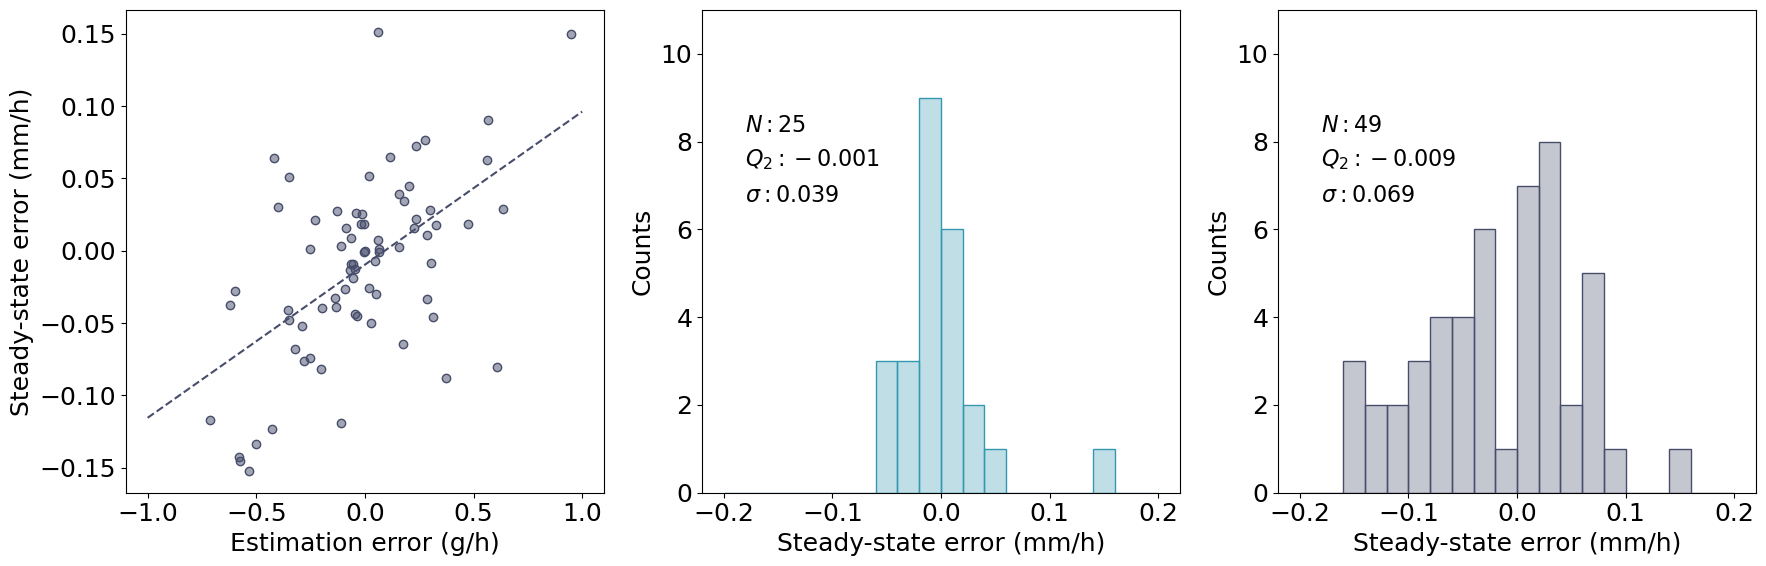

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

save_option = True
figsavepath = "../Figures/FigureS13_evap-estimation.svg"

path = "../Data/01_SUMMARY.xlsx"
df = pd.read_excel(path,sheet_name='Data2') # removed uncontrolled

# read the data
X1 = df['Evap'].to_list()
X2 = df['Est_Evap'].to_list()
Y1 = df['PV'].to_list()
Y2 = df['SV'].to_list()

# remove failed data
False_check = df['FALSE'].to_list()
False_indices = [i for i, x in enumerate(False_check) if x == 1]
for index in sorted(False_indices, reverse=True):
    del X1[index]
    del X2[index]
    del Y1[index]
    del Y2[index]

# remove nan
nan_indices = [i for i, x in enumerate(X1) if isinstance(x, float) and math.isnan(x)]
for index in sorted(nan_indices, reverse=True):
    del X1[index]
    del X2[index]
    del Y1[index]
    del Y2[index]

# prepare the data
X = [m-n for m,n in zip(X2,X1)]
Y = [m-n for m,n in zip(Y2,Y1)]

# Linear fitting
slope, intercept = np.polyfit(X,Y,1)
x_fit = [-1,1]
y_fit = [n*slope + intercept for n in x_fit]

correlation, _ = pearsonr(np.array(X), np.array(Y))

print(f"Correlation Factor in Panel a: {correlation:.3f}")


# Histogram deconvolution
estimation_threshold = 0.1

X_good, Y_good = [], []
X_bad, Y_bad = [], []
for x, y in zip(X,Y):
    if abs(x) < estimation_threshold:
        X_good.append(x)
        Y_good.append(y)
    else:
        X_bad.append(x)
        Y_bad.append(y)

print(f'\nAll experiments: N = {len(Y)}')
count_005_original = sum(1 for x in Y if abs(x) <= 0.05)
print(f'count005: {count_005_original}')
print(f'Success rate: {count_005_original/len(Y)*100:.2f}%')

print(f'\nGood experiments: N = {len(Y_good)}')
count_005_good = sum(1 for x in Y_good if abs(x) <= 0.05)
print(f'count005: {count_005_good}')
print(f'Success rate: {count_005_good/len(Y_good)*100:.2f}%')

print(f'\nBad experiments: N = {len(Y_bad)}')
count_005_bad = sum(1 for x in Y_bad if abs(x) <= 0.05)
print(f'count005: {count_005_bad}')
print(f'Success rate: {count_005_bad/len(Y_bad)*100:.2f}%')

# Figure plot
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots(nrows=1, ncols=3, tight_layout=True, figsize=(18,6))

bin_width = 0.02
bin_edges = np.arange(start=-0.2, stop=0.2 + bin_width, step=bin_width)
color1 = "#474D6B" # dark blue
color2 = '#3498B0' # light blue

axes[0].scatter(X,Y,color=f'{color1}80', edgecolor = color1)
axes[0].set_xlabel('Estimation error (g/h)')
axes[0].set_ylabel('Steady-state error (mm/h)')
axes[0].plot(x_fit, y_fit, linestyle = 'dashed', color = color1)

axes[1].hist(Y_good,color=f"{color2}50", ec=color2, bins = bin_edges)
axes[1].set_xlabel('Steady-state error (mm/h)')
axes[1].set_ylabel('Counts')
axes[1].set_ylim(0,11)
axes[1].text(-0.18, 8.1, '$\it{N}: 25$', ha='left', va='bottom',color="black",fontsize=16)
axes[1].text(-0.18, 7.3, '$\it{Q}_{2}: -0.001$', ha='left', va='bottom',color="black",fontsize=16)
axes[1].text(-0.18, 6.5, '$\it{σ}: 0.039$', ha='left', va='bottom',color="black",fontsize=16)

axes[2].hist(Y_bad,color=f"{color1}50", ec=color1, bins = bin_edges)
axes[2].set_xlabel('Steady-state error (mm/h)')
axes[2].set_ylabel('Counts')
axes[2].set_ylim(0,11)
axes[2].text(-0.18, 8.1, '$\it{N}: 49$', ha='left', va='bottom',color="black",fontsize=16)
axes[2].text(-0.18, 7.3, '$\it{Q}_{2}: -0.009$', ha='left', va='bottom',color="black",fontsize=16)
axes[2].text(-0.18, 6.5, '$\it{σ}: 0.069$', ha='left', va='bottom',color="black",fontsize=16)

print('\n')
for Y1 in [Y, Y_good, Y_bad]:
    print(f'N: {len(Y1)}, sigma: {np.std(Y1):.3f}, mean: {np.mean(Y1):.3f}, median: {np.median(Y1):.3f}')
    
if save_option:
    plt.savefig(figsavepath, dpi=1200, bbox_inches='tight')

plt.show()